In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#get the 'train' data in the train var

train=pd.read_csv(r'Path of the training data')
#print(train.head())


In [3]:
#get the 'test' data in the test var

test=pd.read_csv(r'Path of the Testing data')
#print(test.head())

In [4]:
#understanding the data- 
#Here we have 12 independent variables and one taregt variable- 'Loan_Status' in the tain data
print(train.columns, '\n\n')
print(test.columns, '\n\n')

#datatypes for the columns
print(train.dtypes, '\n\n')

#shape of the provided data
print(train.shape)
print(test.shape)

train_original= train.copy()
test_original= test.copy()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object') 


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object 


(614, 13)
(367, 12)


In [5]:
#understanding the data in target column
#for 'Loan_status'
train["Loan_Status"].value_counts()

#uncomment the below code to know more about the column 'Loan_Status'
#train['Loan_Status'].value_counts(normalize=True)#it prints proportions instead of numbers
#train['Loan_Status'].value_counts().plot.bar() #rrepresents the data in form of bar graph


Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
'''
LP001002	Male	No	0	Graduate	No	5849	0		360	1	Urban	Y
above is an example row from train data.
The columns Gender, Married, Self_Employed, Credit_History are Categorical features
run the print statement below to view counts/statistics for the following columns
'''
#print(train["Gender"].value_counts(normalize=True), '\n\n',train["Married"].value_counts(normalize=True), '\n\n',train["Self_Employed"].value_counts(normalize=True), '\n\n',train["Credit_History"].value_counts(normalize=True), '\n\n')


'\nLP001002\tMale\tNo\t0\tGraduate\tNo\t5849\t0\t\t360\t1\tUrban\tY\nabove is an example row from train data.\nThe columns Gender, Married, Self_Employed, Credit_History are Categorical features\nrun the print statement below to view counts/statistics for the following columns\n'

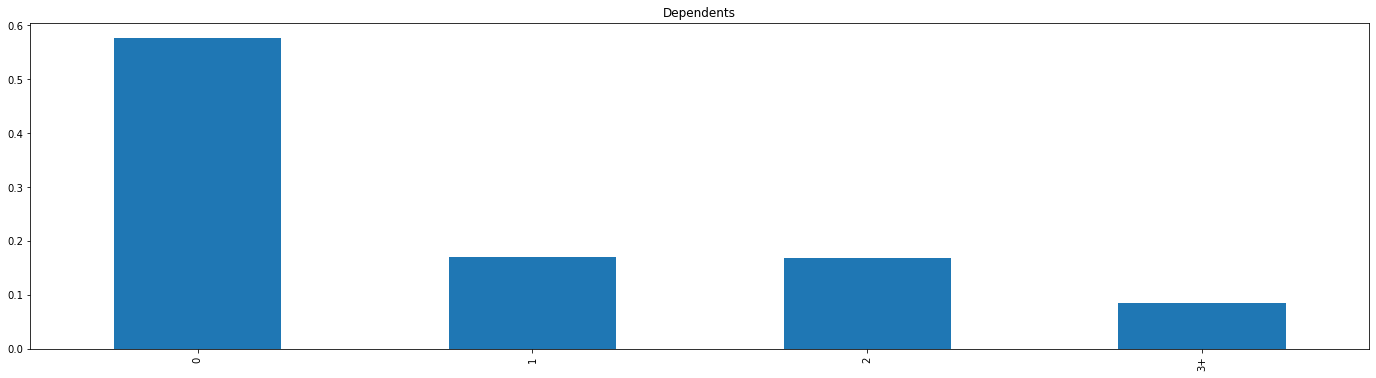

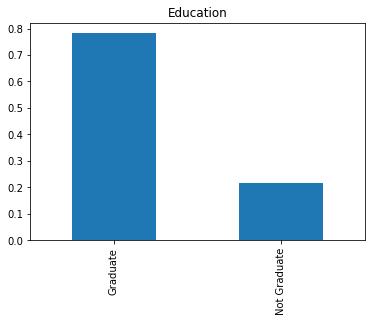

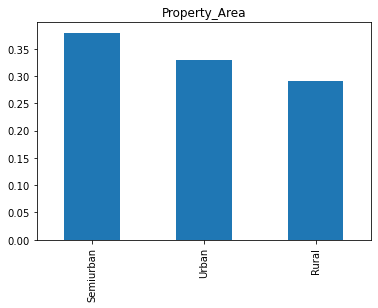

In [7]:
'''
The columns 'Dependents','Education','Property_Area' are Ordinal Features
to understand them more we will plot their respective graphs
'''
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()



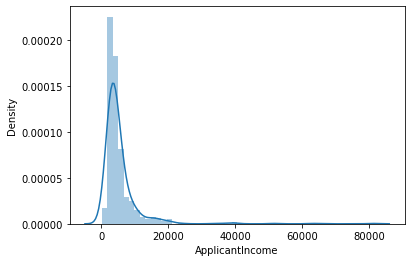

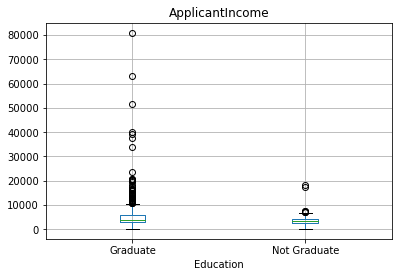

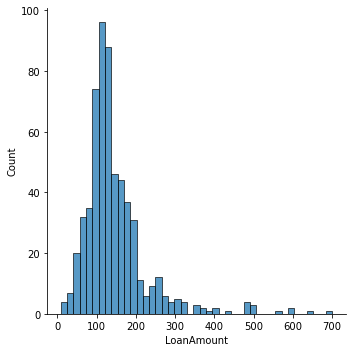

In [8]:
'''
The coulmns ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term are Numerical features
to learn about these columns we will plot their resoective graphs
'''
sns.distplot(train['ApplicantIncome'])
plt.show()
#the graph shows that majority of the distribution of applicant income is towards left i.e. data is unequally distributed towards left

train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")
#this type of graph is known as boxplot, as we can see the number of graduate people with higher income is more than that of 'not graduate'

sns.displot(train['LoanAmount'])
plt.show()


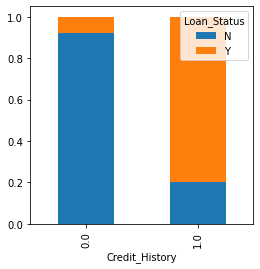

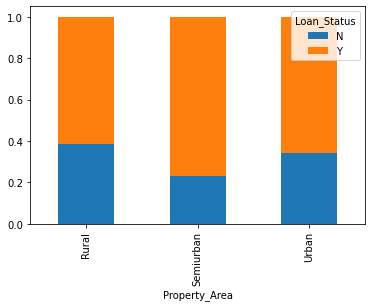

In [9]:
#Lets learn the relation between remaining independent columns with the target column

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
#pandas.crosstab : Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()
#change 'kind'='pie' and subplots='True' to print a pie diagram

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


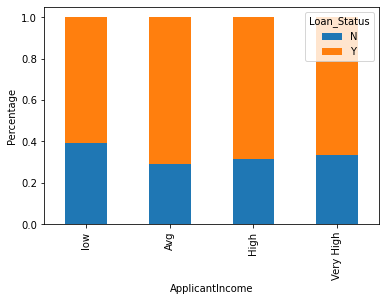

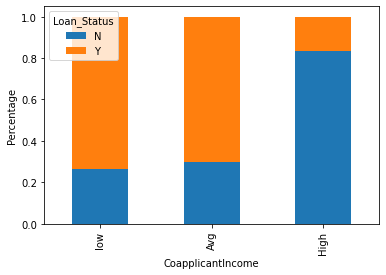

In [10]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())
#to better understand the loan status according to applicant's income- we willmake bins
bins=[0,2000,4000,6000,81000]#define bin
group=['low','Avg','High','Very High']# define group
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

#the first graph reflects that applicants income doesn't affects the loan approval 
#repeat the same procedure for coapplicant income
bins=[0,3000,10000,42000]
group=['low','Avg','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')
#according to the graph if the coapplicants income is high the chances for loan approval is low
#but it doesnt makes sense, maybe because most of the co-applicant need not have a coapplicant

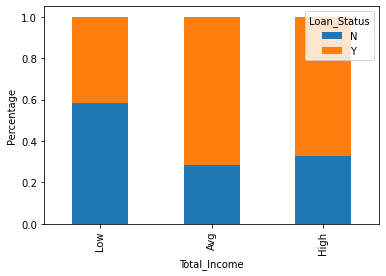

In [11]:
#lets combine applicant and coapplicant income details to reach to a conclusion
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,6000,81000]
group=['Low','Avg','High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')
#as we can see the chances of approval for low combined income is less

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


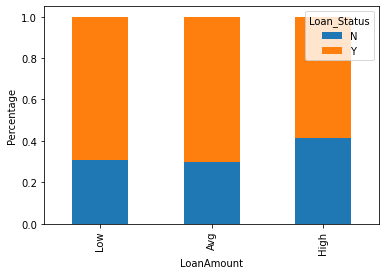

In [12]:
#loan amount
bins=[0,100,300,800]
group=['Low','Avg','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

#proportion of loan amount approved is greater for higher loan amounts.

#drop the bins we created for exploration, uncomment the below line of code
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)
train.head()

<AxesSubplot:>

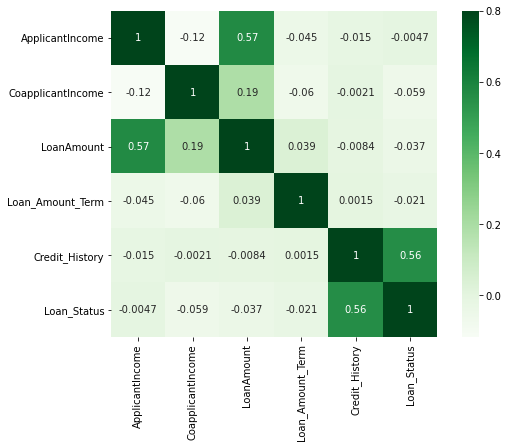

In [13]:
# we use heat map to view corelation between all the numerical values
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="Greens", annot = True)


#Heat Map: 
#Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. 
#The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.


In [14]:
#Missing Value
#print(train.isnull().sum()) #uncomment to view gaps/holes in data

#we can see the missing values lets deal with them- for numerical variables use mean/median and for categorical variables use mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
# dataframe.fillna :Value to use to fill holes (e.g. 0), alternately a dict/Series/DataFrame of values specifying which value to use for each index (for a Series) or column (for a DataFrame). Values not in the dict/Series/DataFrame will not be filled. This value cannot be a list.

#print(train.isnull().sum()) #uncomment to view the difference

#train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
#replace the gap with the value with highest frequency in same column

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
#we filled the gaps with the median value

train.isnull().sum()

#lets do the same for test dataset as well
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

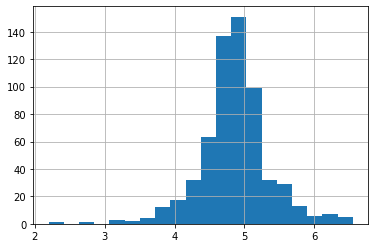

In [15]:
#Loan Amount contains outliers, having outliers have major effect on data
#Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

#we will use log transformation to remove skewness
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

#Our data is now ready, let's drop Loan ID as it does not have any effect on the data
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


In [16]:
#LOGISTIC REGRESSION
X= train.drop('Loan_Status',1)
y= train.Loan_Status #saving the target column in a different dataset

#dummy variable changes categorical values into a series of 0 and 1
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [17]:
#now we will train the model on the training dataset and make predictions for the dataset

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)
#train_test_split is a function from sklearn, it divides our dataset into training and validation part


In [18]:
#let's fit the logic regression mode
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

#lets predict the loan status for the validation dataset and match our accuracy
pred_cv = model.predict(x_cv)
print(accuracy_score(y_cv,pred_cv))

#our predictions are almost 80% accurate

#predictions for dataset
X = train.iloc[:, :21].values
pred_test = model.predict(test)

0.772972972972973


In [50]:
submission = pd.read_csv(r'Path of the submission data')

submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission.head()
#submission.to_excel(r'C:\Users\Vaishnavi\Desktop\Dataset\output.xlsx', index = False) 
#save the submission dataframe into excel sheet

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


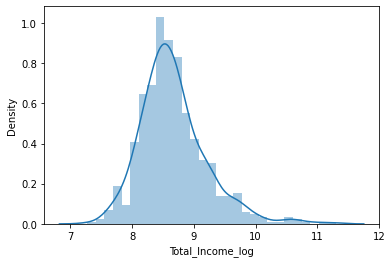

In [57]:
#adding new features like Total Income, EMI, Balance Income

#Total Income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
#the distribution is rightskewed so lets take log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])



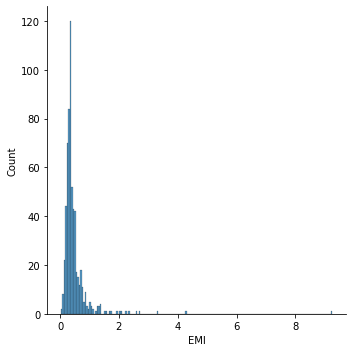

In [58]:
#EMI
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.displot(train['EMI'])


<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

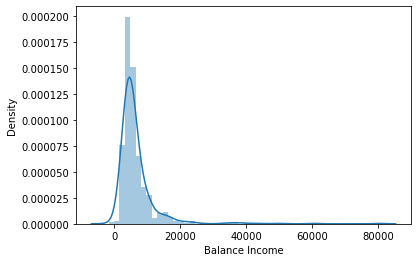

In [59]:
#Balance Income
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [60]:
#now, we will drop the columns which we used to create these new features in order to avaoid to remove noiser,
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [64]:
#Decision Tree

from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

#this was one method used for prediction. Similarly we can try this with
#logisctic Regression
#Random Forest
#Grid search
#XGBoost


1 of kfold 5 
accuracy_score 0.7398373983739838

2 of kfold 5 
accuracy_score 0.6991869918699187

3 of kfold 5 
accuracy_score 0.7560975609756098

4 of kfold 5 
accuracy_score 0.7073170731707317

5 of kfold 5 
accuracy_score 0.6721311475409836

 Mean Validation Accuracy 0.7149140343862455
